<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LinearRegression

In [0]:
!wget https://raw.githubusercontent.com/PytLab/MLBox/master/linear_regression/abalone.txt

In [0]:
!wget https://raw.githubusercontent.com/PytLab/MLBox/master/linear_regression/ex0.txt

In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import itertools
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def load_data(filename):
    ''' 加载数据
    '''
    X, Y = [], []
    with open(filename, 'r') as f:
        for line in f:
            splited_line = [float(i) for i in line.split()]
            x, y = splited_line[: -1], splited_line[-1]
            X.append(x)
            Y.append(y)
    X, Y = np.matrix(X), np.matrix(Y).T
    return X, Y

def standarize(X):
    ''' 中心化 & 标准化数据 (零均值, 单位标准差)
    '''
    std_deviation = np.std(X, 0)
    mean = np.mean(X, 0)
    return (X - mean)/std_deviation

def get_corrcoef(X, Y):
    # X Y 的协方差
    cov = np.mean(X*Y) - np.mean(X)*np.mean(Y)
    return cov/(np.var(X)*np.var(Y))**0.5

## 标准线性回归

In [0]:
def std_linreg(X, Y):
    xTx = X.T*X
    if np.linalg.det(xTx) == 0:
        print('xTx is a singular matrix')
        return
    return xTx.I*X.T*Y

In [30]:
if '__main__' == __name__:
    # 加载数据
    X, Y = load_data('abalone.txt')
    X, Y = standarize(X), standarize(Y)
    w = std_linreg(X, Y)
    Y_prime = X*w

    print('w: {}'.format(w))

    # 计算相关系数
    corrcoef = get_corrcoef(np.array(Y.reshape(1, -1)),
                            np.array(Y_prime.reshape(1, -1)))
    print('Correlation coeffient: {}'.format(corrcoef))

    #fig = plt.figure()
    #ax = fig.add_subplot(111)

    ## 绘制数据点
    #x = X[:, 1].reshape(1, -1).tolist()[0]
    #y = Y.reshape(1, -1).tolist()[0]
    #ax.scatter(x, y)

    ## 绘制拟合直线
    #x1, x2 = min(x), max(x)
    #y1 = (np.matrix([1, x1])*w).tolist()[0][0]
    #y2 = (np.matrix([1, x2])*w).tolist()[0][0]
    #ax.plot([x1, x2], [y1, y2], c='r')

    #plt.show()


w: [[ 0.0162406 ]
 [-0.05874764]
 [ 0.41308287]
 [ 0.15391644]
 [ 1.4069792 ]
 [-1.39621019]
 [-0.3318546 ]
 [ 0.37046383]]
Correlation coeffient: 0.7265610337306003


## 局部加权线性回归

In [0]:
def lwlr(x, X, Y, k):
    ''' 局部加权线性回归，给定一个点，获取相应权重矩阵并返回回归系数
    '''
    m = X.shape[0]

    # 创建针对x的权重矩阵
    W = np.matrix(np.zeros((m, m)))
    for i in range(m):
        xi = np.array(X[i][0])
        x = np.array(x)
        W[i, i] = exp((np.linalg.norm(x - xi))/(-2*k**2))

    # 获取此点相应的回归系数

    xWx = X.T*W*X
    if np.linalg.det(xWx) == 0:
        print('xWx is a singular matrix')
        return
    w = xWx.I*X.T*W*Y

    return w

Correlation coefficient: 0.9995975498286577


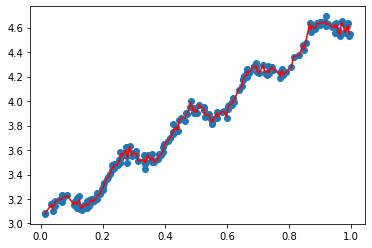

In [32]:
if '__main__' == __name__:
    k = 0.03

    X, Y = load_data('ex0.txt')
    
    y_prime = []
    for x in X.tolist():
        w = lwlr(x, X, Y, k).reshape(1, -1).tolist()[0]
        y_prime.append(np.dot(x, w))

    corrcoef = get_corrcoef(np.array(Y.reshape(1, -1)), np.array(y_prime))
    print('Correlation coefficient: {}'.format(corrcoef))

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 绘制数据点
    x = X[:, 1].reshape(1, -1).tolist()[0]
    y = Y.reshape(1, -1).tolist()[0]
    ax.scatter(x, y)

    # 绘制拟合直线
    x, y = list(zip(*sorted(zip(x, y_prime), key=lambda x: x[0])))
    ax.plot(x, y, c='r')

    plt.show()

## 岭回归

In [0]:
def ridge_regression(X, y, lambd=0.2):
    ''' 获取岭回归系数
    '''
    XTX = X.T*X
    m, _ = XTX.shape
    I = np.matrix(np.eye(m))
    w = (XTX + lambd*I).I*X.T*y
    return w

def ridge_traj(X, y, ntest=30):
    ''' 获取岭轨迹矩阵
    '''
    _, n = X.shape
    ws = np.zeros((ntest, n))
    for i in range(ntest):
        w = ridge_regression(X, y, lambd=exp(i-10))
        ws[i, :] = w.T
    return ws

Best w: [[ 0.01013554]
 [-0.01118452]
 [ 0.68269791]
 [-0.18625909]
 [ 0.56556456]
 [-0.76039839]
 [-0.0587618 ]
 [ 0.40240551]], best error: 0.7421407031499295
Correlation coefficient: 0.6748460114148502
Weight w_i: [[ 1.62405910e-02 -5.87475193e-02  4.13082713e-01  1.53916452e-01
   1.40697689e+00 -1.39620909e+00 -3.31854069e-01  3.70464606e-01]
 [ 1.62405822e-02 -5.87473049e-02  4.13082442e-01  1.53916476e-01
   1.40697292e+00 -1.39620722e+00 -3.31853151e-01  3.70465935e-01]
 [ 1.62405585e-02 -5.87467221e-02  4.13081703e-01  1.53916541e-01
   1.40696212e+00 -1.39620211e+00 -3.31850655e-01  3.70469550e-01]
 [ 1.62404941e-02 -5.87451378e-02  4.13079694e-01  1.53916717e-01
   1.40693277e+00 -1.39618823e+00 -3.31843869e-01  3.70479376e-01]
 [ 1.62403189e-02 -5.87408315e-02  4.13074234e-01  1.53917198e-01
   1.40685300e+00 -1.39615049e+00 -3.31825427e-01  3.70506084e-01]
 [ 1.62398427e-02 -5.87291262e-02  4.13059393e-01  1.53918504e-01
   1.40663620e+00 -1.39604795e+00 -3.31775306e-01  3

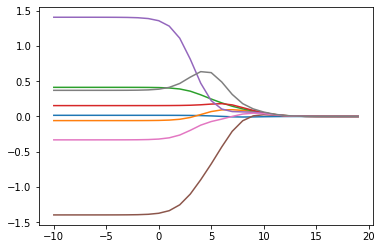

In [34]:
if '__main__' == __name__:
    ntest = 30
    # 加载数据
    X, y = load_data('abalone.txt')

    # 中心化 & 标准化
    X, y = standarize(X), standarize(y)

    # 测试数据和训练数据
    w_test, errors = [], []
    for i in range(ntest):
        lambd = exp(i - 10)
        # 训练数据
        X_train, y_train = X[: 180, :], y[: 180, :]
        # 测试数据
        X_test, y_test = X[180: -1, :], y[180: -1, :]

        # 岭回归系数
        w = ridge_regression(X_train, y_train, lambd)
        error = np.std(X_test*w - y_test)
        w_test.append(w)
        errors.append(error)

    # 选择误差最小的回归系数
    w_best, e_best = min(zip(w_test, errors), key=lambda x: x[1])
    print('Best w: {}, best error: {}'.format(w_best, e_best))

    y_prime = X*w_best
    # 计算相关系数
    corrcoef = get_corrcoef(np.array(y.reshape(1, -1)),
                            np.array(y_prime.reshape(1, -1)))
    print('Correlation coefficient: {}'.format(corrcoef))

    # 绘制岭轨迹
    ws = ridge_traj(X, y, ntest)
    print('Weight w_i: {}'.format(ws))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    lambdas = [i-10 for i in range(ntest)]
    ax.plot(lambdas, ws)

    plt.show()

## LASSO回归

### 坐标下降

In [0]:
def lasso_regression(X, y, lambd=0.2, threshold=0.1):
    ''' 通过坐标下降(coordinate descent)法获取LASSO回归系数
    '''
    # 计算残差平方和
    rss = lambda X, y, w: (y - X*w).T*(y - X*w)

    # 初始化回归系数w.
    m, n = X.shape
    w = np.matrix(np.zeros((n, 1)))
    r = rss(X, y, w)

    # 使用坐标下降法优化回归系数w
    niter = itertools.count(1)

    for it in niter:
        for k in range(n):
            # 计算常量值z_k和p_k
            z_k = (X[:, k].T*X[:, k])[0, 0]
            p_k = 0
            for i in range(m):
                p_k += X[i, k]*(y[i, 0] - sum([X[i, j]*w[j, 0] for j in range(n) if j != k]))

            if p_k < -lambd/2:
                w_k = (p_k + lambd/2)/z_k
            elif p_k > lambd/2:
                w_k = (p_k - lambd/2)/z_k
            else:
                w_k = 0

            w[k, 0] = w_k

        r_prime = rss(X, y, w)
        delta = abs(r_prime - r)[0, 0]
        r = r_prime
        #print('Iteration: {}, delta = {}'.format(it, delta))

        if delta < threshold:
            break

    return w

def lasso_traj(X, y, ntest=30):
    ''' 获取回归系数轨迹矩阵
    '''
    _, n = X.shape
    ws = np.zeros((ntest, n))
    for i in range(ntest):
        w = lasso_regression(X, y, lambd=exp(i-10))
        ws[i, :] = w.T
        print('lambda = e^({}), w = {}'.format(i-10, w.T[0, :]))
    return ws

lambda = e^(-10), w = [[ 0.01660577 -0.0477072   0.41365826  0.15553501  1.11561007 -1.28671007
  -0.26342221  0.47832296]]
lambda = e^(-9), w = [[ 0.01660576 -0.04770667  0.41365771  0.15553499  1.11560914 -1.28670963
  -0.26342191  0.47832323]]
lambda = e^(-8), w = [[ 0.01660572 -0.04770526  0.41365621  0.15553496  1.11560659 -1.28670843
  -0.2634211   0.47832395]]
lambda = e^(-7), w = [[ 0.01660563 -0.04770141  0.41365214  0.15553486  1.11559967 -1.28670516
  -0.26341888  0.4783259 ]]
lambda = e^(-6), w = [[ 0.01660536 -0.04769094  0.41364108  0.1555346   1.11558085 -1.28669629
  -0.26341285  0.47833122]]
lambda = e^(-5), w = [[ 0.01660465 -0.04766249  0.41361102  0.15553388  1.11552969 -1.28667218
  -0.26339646  0.47834566]]
lambda = e^(-4), w = [[ 0.0166027  -0.04758516  0.41352929  0.15553192  1.11539062 -1.28660663
  -0.2633519   0.47838494]]
lambda = e^(-3), w = [[ 0.01659742 -0.04737496  0.41330714  0.1555266   1.1150126  -1.28642845
  -0.26323077  0.47849169]]
lambda = e^(-2)

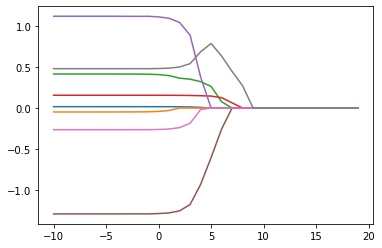

In [36]:
if '__main__' == __name__:
    X, y = load_data('abalone.txt')
    X, y = standarize(X), standarize(y)
#    w = lasso_regression(X, y, lambd=10)
#
#    y_prime = X*w
#    # 计算相关系数
#    corrcoef = get_corrcoef(np.array(y.reshape(1, -1)),
#                            np.array(y_prime.reshape(1, -1)))
#    print('Correlation coefficient: {}'.format(corrcoef))


    ntest = 30

    # 绘制轨迹
    ws = lasso_traj(X, y, ntest)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    lambdas = [i-10 for i in range(ntest)]
    ax.plot(lambdas, ws)

    plt.show()

### 向前逐步回归

In [0]:
def stagewise_regression(X, y, eps=0.01, niter=100):
    ''' 通过向前逐步回归获取回归系数
    '''
    m, n = X.shape
    w = np.matrix(np.zeros((n, 1)))
    min_error = float('inf')
    all_ws = np.matrix(np.zeros((niter, n)))

    # 计算残差平方和
    rss = lambda X, y, w: (y - X*w).T*(y - X*w)

    for i in range(niter):
        print('{}: w = {}'.format(i, w.T[0, :]))
        for j in range(n):
            for sign in [-1, 1]:
                w_test = w.copy()
                w_test[j, 0] += eps*sign
                test_error = rss(X, y, w_test)
                if test_error < min_error:
                    min_error = test_error
                    w = w_test
        all_ws[i, :] = w.T

    return all_ws

0: w = [[0. 0. 0. 0. 0. 0. 0. 0.]]
1: w = [[-0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005]]
2: w = [[-0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]]
3: w = [[-0.015  0.015  0.015  0.015  0.015  0.015  0.015  0.015]]
4: w = [[-0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02]]
5: w = [[-0.025  0.025  0.025  0.025  0.025  0.025  0.025  0.025]]
6: w = [[-0.03  0.03  0.03  0.03  0.03  0.03  0.03  0.03]]
7: w = [[-0.03   0.035  0.035  0.035  0.035  0.035  0.035  0.035]]
8: w = [[-0.025  0.04   0.04   0.04   0.04   0.04   0.04   0.04 ]]
9: w = [[-0.025  0.045  0.045  0.045  0.045  0.045  0.045  0.045]]
10: w = [[-0.025  0.05   0.05   0.05   0.05   0.05   0.05   0.05 ]]
11: w = [[-0.025  0.055  0.055  0.055  0.055  0.055  0.055  0.055]]
12: w = [[-0.025  0.06   0.06   0.06   0.06   0.06   0.06   0.06 ]]
13: w = [[-0.02   0.065  0.065  0.065  0.065  0.065  0.065  0.065]]
14: w = [[-0.02  0.07  0.07  0.07  0.07  0.06  0.07  0.07]]
15: w = [[-0.02   0.075  0.075  0.075  0.075  0.055  0

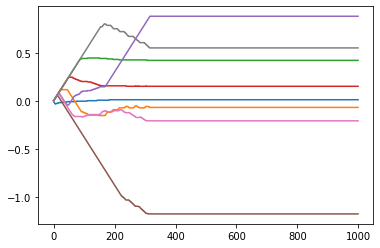

In [38]:
if '__main__' == __name__:
    X, y = load_data('abalone.txt')
    X, y = standarize(X), standarize(y)

    epsilon = 0.005
    niter = 1000
    all_ws = stagewise_regression(X, y, eps=epsilon, niter=niter)

    w = all_ws[-1, :]
    y_prime = X*w.T

    # 计算相关系数
    corrcoef = get_corrcoef(np.array(y.reshape(1, -1)),
                            np.array(y_prime.reshape(1, -1)))
    print('Correlation coefficient: {}'.format(corrcoef))

    # 绘制逐步线性回归回归系数变化轨迹

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(list(range(niter)), all_ws)
    plt.show()